In [32]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_rel

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10) #specifies the confihuration of plot

#Read in the data

df=pd.read_csv(r'C:\Users\agogs\OneDrive\Documents\Data Analysis - Files\Portfolio Projects\Python\movies.csv')

In [3]:
# Explore data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Verifying missing data points

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [28]:
#Imputation of missing values with modal value

df = df.fillna(df.mode().iloc[0])

#Verification of updated data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [29]:
#splitting the released column 
df[['releasedate','releasecountry','']] = df['released'].str.split('\(|\)', expand = True)
df = df.drop([''], axis=1) #drops extra blank column that was created

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [7]:
#reviewing datatypes
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
releasedate        object
releasecountry     object
dtype: object

In [30]:
#explore data, no missing values
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.390493,8.807912e+04,3.117600e+07,7.691074e+07,107.256260
std,11.153508,0.968661,1.632986e+05,3.579625e+07,1.639750e+08,18.577877
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.000000e+07,1.895543e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.200000e+07,7.262022e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
#change datatype of columns
df ['votes'] = df['votes'].astype('int64')
df ['budget'] = df['budget'].astype('int64')
df ['gross'] = df['gross'].astype('int64')
df ['runtime'] = df['runtime'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States


In [9]:
#Normalizing the year column because some release dates do not correspond to it
df['correctyear'] = df['releasedate'].astype(str).str[-5:-1]
df ['correctyear'] = df['correctyear'].astype('int64')
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States,1980


In [10]:
#replacing bad characters

bad_chars = ['!','*','.']
for i in bad_chars:
    df['name'] = df['name'].str.replace(i,'', regex = True)
    df['company'] = df['company'].str.replace(i,'', regex = True)
    
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros,146,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States,1980
3,Airplane,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States,1980


In [11]:
#viewing all movies from highest grossing movies to lowest
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

#set display to view all data
pd.set_option('display.max_rows',None)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,2018


In [12]:
#drop any duplicates in company column to view distinct values and check if any value needs to be cleaned/ merged
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
#Null Hypothesis 1: Budget will not have a high correleration with gross earnings
#Null Hypothesis 2: Company will not have a high correleration with gross earnings

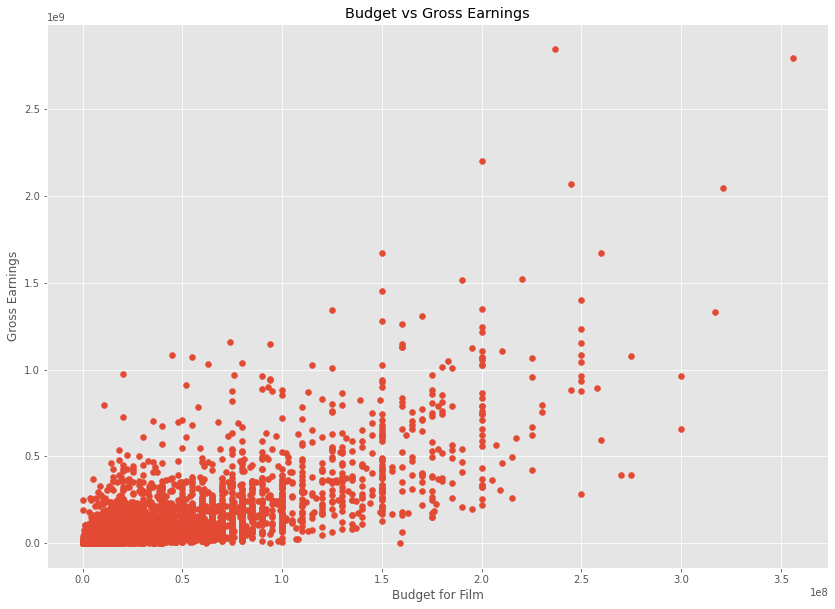

In [13]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

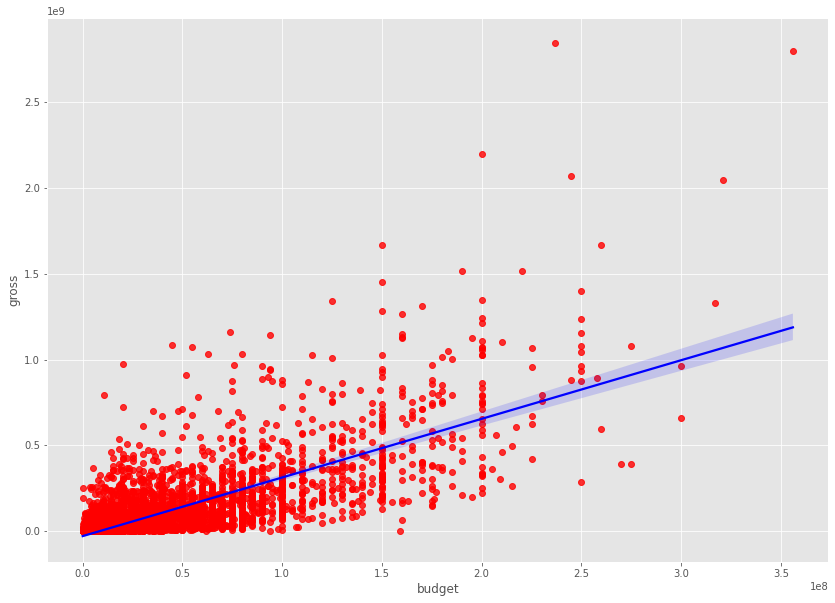

In [14]:
#Regression plot of budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [15]:
#examining correlation for columns with numeric values

df.corr(method ='pearson') #kendall, spearman, pearson


,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.098084,0.222485,0.292360,0.260251,0.120431,0.996802
score,0.098084,1.000000,0.409123,0.061775,0.185799,0.399543,0.106290
votes,0.222485,0.409123,1.000000,0.462013,0.632376,0.309150,0.217907
budget,0.292360,0.061775,0.462013,1.000000,0.746670,0.273507,0.284751
gross,0.260251,0.185799,0.632376,0.746670,1.000000,0.244711,0.253495
runtime,0.120431,0.399543,0.309150,0.273507,0.244711,1.000000,0.120557
correctyear,0.996802,0.106290,0.217907,0.284751,0.253495,0.120557,1.000000


In [ ]:
#High correlation seen between budget and gross

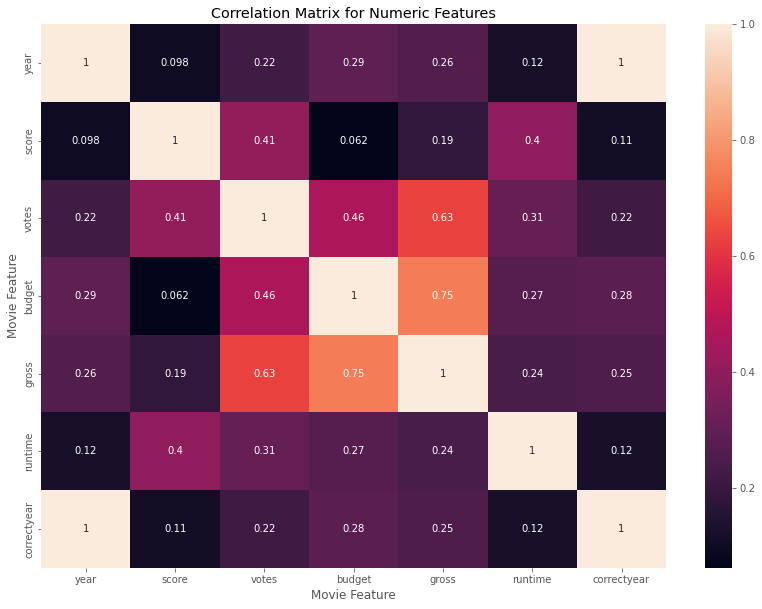

In [16]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()



In [18]:
#Converting string values to numeric configuration (dummy variable) to examine correlation across all fields

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category') #changes all strings to numeric vakues
        df_numerized[col_name] = df_numerized[col_name].cat.codes #gives a random numerization
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
5445,532,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,610,56,2009
7445,534,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,153,56,2019
3045,6893,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,616,56,1997
6663,5141,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,612,56,2015
7244,535,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,161,56,2018


In [17]:
#quick accuracy check
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,2018


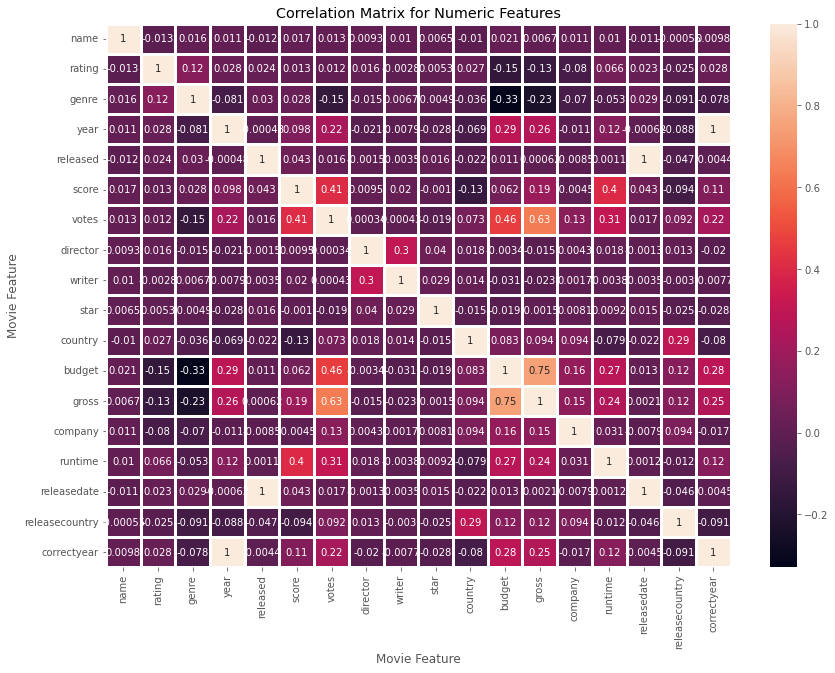

In [19]:
#correlation of all movie features

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, linewidth = 3)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()


In [20]:
#viewing all correlation values

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,releasecountry,correctyear
name,1.000000,-0.012918,0.016412,0.010914,-0.011549,0.017258,0.012895,0.009261,0.010272,0.006537,-0.010226,0.020853,0.006693,0.010933,0.010187,-0.011461,-0.000551,0.009832
rating,-0.012918,1.000000,0.123465,0.027931,0.023643,0.013304,0.012253,0.016255,-0.002795,0.005314,0.026930,-0.148192,-0.130496,-0.079642,0.066499,0.022764,-0.025296,0.028017
genre,0.016412,0.123465,1.000000,-0.081261,0.029997,0.027970,-0.145294,-0.015258,0.006746,-0.004856,-0.035896,-0.328865,-0.233674,-0.070015,-0.052759,0.029215,-0.090932,-0.078120
year,0.010914,0.027931,-0.081261,1.000000,-0.000484,0.098084,0.222485,-0.020795,-0.007901,-0.027745,-0.069423,0.292360,0.260251,-0.011465,0.120431,-0.000620,-0.088384,0.996802
released,-0.011549,0.023643,0.029997,-0.000484,1.000000,0.042703,0.015930,-0.001492,-0.003461,0.015550,-0.022042,0.011002,0.000624,-0.008452,0.001117,0.999912,-0.046574,-0.004379
score,0.017258,0.013304,0.027970,0.098084,0.042703,1.000000,0.409123,0.009522,0.019700,-0.001031,-0.134538,0.061775,0.185799,-0.004545,0.399543,0.042833,-0.094038,0.106290
votes,0.012895,0.012253,-0.145294,0.222485,0.015930,0.409123,1.000000,0.000336,0.000432,-0.019341,0.073500,0.462013,0.632376,0.130533,0.309150,0.016945,0.092350,0.217907
director,0.009261,0.016255,-0.015258,-0.020795,-0.001492,0.009522,0.000336,1.000000,0.299512,0.039715,0.017926,-0.003361,-0.014808,0.004263,0.017583,-0.001289,0.013301,-0.020399
writer,0.010272,-0.002795,0.006746,-0.007901,-0.003461,0.019700,0.000432,0.299512,1.000000,0.028745,0.014409,-0.030961,-0.023007,0.001668,-0.003751,-0.003491,-0.002998,-0.007694
star,0.006537,0.005314,-0.004856,-0.027745,0.015550,-0.001031,-0.019341,0.039715,0.028745,1.000000,-0.014749,-0.018863,-0.001529,0.008081,0.009208,0.015370,-0.024893,-0.028117


In [25]:
#clearer view of individual correloration of movie features
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack() #print corr_pairs to view correlation of each feature with all

#sorting correlation movie features

sorted_pairs = corr_pairs.sort_values() #print sorted_pairs to view sorted corr values

#features with high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


gross           votes             0.632376
votes           gross             0.632376
budget          gross             0.746670
gross           budget            0.746670
year            correctyear       0.996802
correctyear     year              0.996802
released        releasedate       0.999912
releasedate     released          0.999912
name            name              1.000000
releasedate     releasedate       1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
score           score             1.000000
votes           votes             1.000000
releasecountry  releasecountry    1.000000
director        director          1.000000
star            star              1.000000
country         country           1.000000
budget          budget            1.000000
gross           gross             1.000000
company         company           1.000000
runtime    

In [ ]:
#Correlation above shows that company does not have a high correlation with gross earnings. Hence, company cannot be a determining factor of level of earnings

#Votes and budget have the highest correlation to gross earnings

In [ ]:
#Checking p-values for votes and budget to see if the correlation is statistically significant

In [40]:
#determining pvalue for votes
Votes_pvalue = ttest_rel(df_numerized.votes, df_numerized.gross)

Votes_pvalue

Ttest_relResult(statistic=-41.05122847406444, pvalue=0.0)

In [38]:
#determining pvalue for budget
_,Budget_pvalue = ttest_rel(df_numerized.budget, df_numerized.gross)
Budget_pvalue

1.0128244826876725e-172

In [43]:
if Budget_pvalue <= 0.05:
    print ('Reject 1st null hypothesis')

Reject 1st null hypothesis


In [ ]:
#Result above shows that the correlation seen for Votes and Budget are statistically significant

#Based on the hypothesis testing, I will reject the 1st null hypothesis and accept the 2nd null hypothesis

#Additional insights gathered is that in addition to budget, votes is another good predictor of gross earnings. Both features can be used for model training